In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/S00_Strains_Control_Stellate_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/control_stellate/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Check qc stats

In [3]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/control_stellate//
./control_stellate_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
AJ_M_Stellate_RNA_AJ01A_HBENN_l20201124_ATGGCATG_AAGGTACC.aj.star_shifted_from_AJ.sam,7442120.0,75.0,0.005390,1.971,2.721435e+09,15888862.0,14667283.0,868884.0,0.0,0.0123,0.0037,0.923117,0.9840
AJ_M_Stellate_RNA_AJ01B_HBENN_l20201124_GCAATGCA_GGAACGTT.aj.star_shifted_from_AJ.sam,6813345.0,75.0,0.005181,2.070,2.721621e+09,15664029.0,14100320.0,879684.0,0.0,0.0339,0.0038,0.900172,0.9623
AJ_M_Stellate_RNA_AJ01C_HBENN_l20201124_GTTCCAAT_AATTCTGC.aj.star_shifted_from_AJ.sam,7714456.0,75.0,0.006115,2.157,2.721105e+09,18012995.0,16638903.0,996333.0,0.0,0.0113,0.0045,0.923717,0.9842
AJ_M_Stellate_RNA_AJ01D_HBENN_l20201124_ACCTTGGC_GGCCTCAT.aj.star_shifted_from_AJ.sam,7003447.0,75.0,0.005313,2.064,2.720812e+09,15957968.0,14455552.0,800832.0,0.0,0.0346,0.0041,0.905852,0.9613
BALBC_M_Stellate_RNA_BALB01A_HBENN_l20201124_ATATCTCG_ATCTTAGT.balbcj.star_shifted_from_BALBCJ.sam,5700459.0,75.0,0.003895,1.859,2.721300e+09,11852049.0,10598142.0,594955.0,0.0,0.0425,0.0039,0.894203,0.9536
BALBC_M_Stellate_RNA_BALB01B_HBENN_l20201124_GCGCTCTA_GCTCCGAC.balbcj.star_shifted_from_BALBCJ.sam,7027045.0,75.0,0.005594,2.167,2.721658e+09,16631124.0,15225378.0,858936.0,0.0,0.0206,0.0039,0.915475,0.9755
BALBC_M_Stellate_RNA_BALB01C_HBENN_l20201124_AACAGGTT_ATACCAAG.balbcj.star_shifted_from_BALBCJ.sam,7282026.0,75.0,0.005838,2.182,2.721627e+09,17126873.0,15889628.0,884134.0,0.0,0.0068,0.0043,0.927760,0.9889
BALBC_M_Stellate_RNA_BALB01D_HBENN_l20201124_GGTGAACC_GCGTTGGA.balbcj.star_shifted_from_BALBCJ.sam,6777384.0,75.0,0.005981,2.402,2.721626e+09,17444246.0,16278804.0,883602.0,0.0,0.0054,0.0036,0.933190,0.9910
C57B6J_M_Stellate_RNA_C5701A_HBENN_l20201124_CAACAATG_CTTCACGG,7070782.0,75.0,0.005702,2.195,4.710000e-01,17188670.0,15519935.0,1017144.0,0.0,0.0251,0.0048,0.902917,0.9701
C57B6J_M_Stellate_RNA_C5701B_HBENN_l20201124_TGGTGGCA_TCCTGTAA,5726832.0,75.0,0.005002,2.377,4.760000e-01,16332351.0,13613276.0,883238.0,0.0,0.0999,0.0046,0.833516,0.8955


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [5]:
c57_paths = list(np.sort(glob.glob(dataDirectory+'/C57*')))
balbc_paths = list(np.sort(glob.glob(dataDirectory+'/BALBC*')))
aj_paths = list(np.sort(glob.glob(dataDirectory+'/AJ*')))

In [6]:
c57_ids = [i.split('/')[-1].split('_')[4] for i in c57_paths]
balbc_ids = [i.split('/')[-1].split('_')[4] for i in balbc_paths]
aj_ids = [i.split('/')[-1].split('_')[4] for i in aj_paths]

In [7]:
ids = ['c57_stellate_control_young',
       'balbc_stellate_control_young',
       'aj_stellate_control_young']
colors = ['#31a354',
          '#3182bd',
          '#de2d26']
paths = [';'.join(c57_paths),
         ';'.join(balbc_paths),
         ';'.join(aj_paths)]
short_ids = [';'.join([ids[0]+'_'+i for i in c57_ids]),
             ';'.join([ids[1]+'_'+i for i in balbc_ids]),
             ';'.join([ids[2]+'_'+i for i in aj_ids])]

In [8]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

# Import differential gene files for examination and plotting

In [9]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [10]:
strains = ['aj', 'balb', 'c57']
log2fc = 1
padj = 0.05

In [11]:
gene_list_dict ={}

In [51]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_stellate_control_young.vs.c57_stellate_control_young.scatter.homer.txt
ge all transcripts (24940, 18)
Diff Gene selected transcripts (9371, 14)
ge selected transcripts (9371, 18)
./differential/aj_stellate_control_young.vs.balbc_stellate_control_young.scatter.homer.txt
ge all transcripts (24940, 18)
Diff Gene selected transcripts (9338, 14)
ge selected transcripts (9338, 18)
./differential/balbc_stellate_control_young.vs.aj_stellate_control_young.scatter.homer.txt
ge all transcripts (24940, 18)
Diff Gene selected transcripts (9338, 14)
ge selected transcripts (9338, 18)
./differential/balbc_stellate_control_young.vs.c57_stellate_control_young.scatter.homer.txt
ge all transcripts (24940, 18)
Diff Gene selected transcripts (9343, 14)
ge selected transcripts (9343, 18)
./differential/c57_stellate_control_young.vs.balbc_stellate_control_young.scatter.homer.txt
ge all transcripts (24940, 18)
Diff Gene selected transcripts (9343, 14)
ge selected transcripts (9343, 18)
./dif

In [52]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_stellate_control_genes_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

aj_union
697 genes
aj_intersection
145 genes
balb_union
424 genes
balb_intersection
56 genes
c57_union
539 genes
c57_intersection
122 genes


# Plot potential nichenet ligands

In [53]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in raw expression values

In [54]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

Read in nichenet ligand list

In [55]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

### Intersection gene set

In [72]:
act = []
for key in gene_list_dict.keys():
    if 'intersection' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

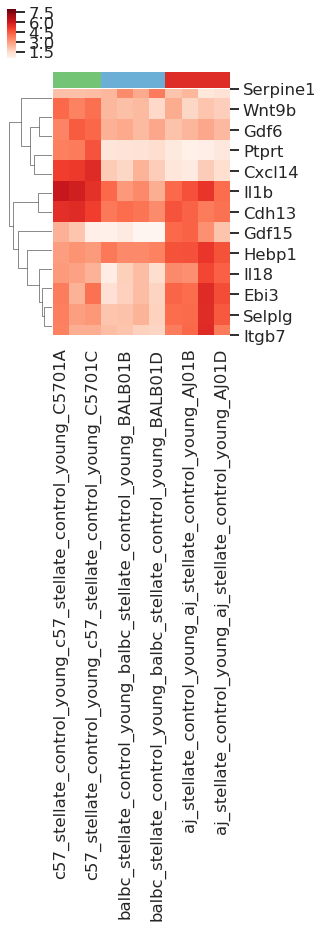

In [73]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

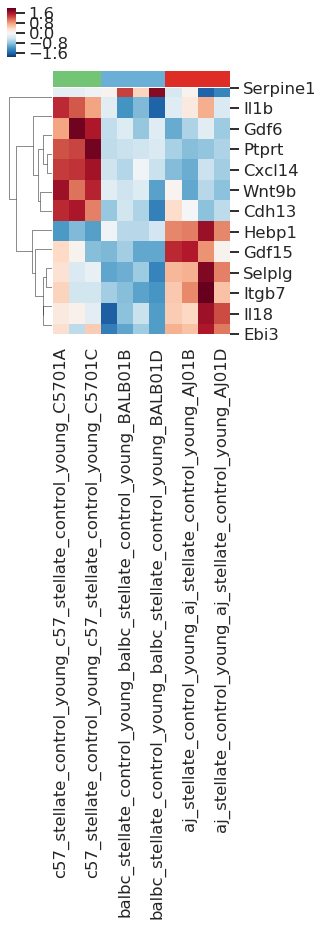

In [74]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

# Look at union gene set

In [68]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

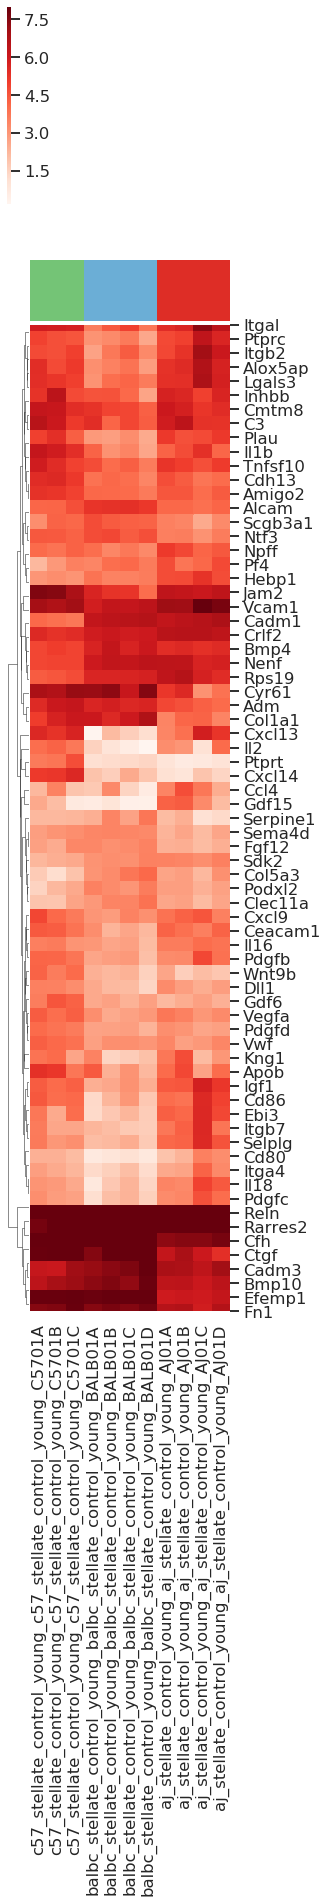

In [69]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,24),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

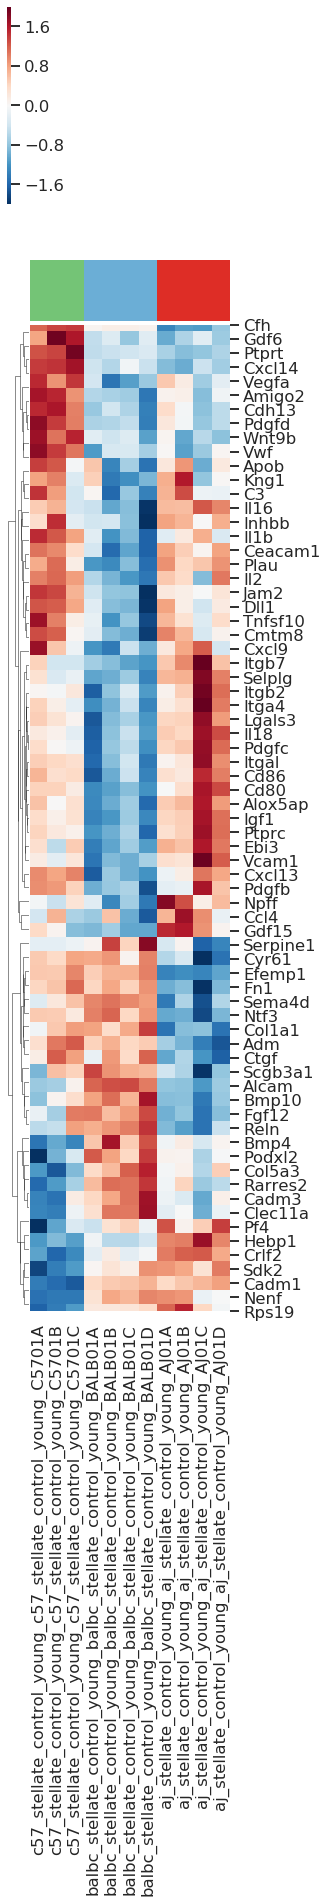

In [70]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,24),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()